In [1]:
# Downsample data to same length as input vector

import re
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import manifold

    
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
import re



%matplotlib inline

In [2]:
names = ['id','category']
for i in range(1,301):
    names.append(str(i))

# Load text description vectors
descriptions = pd.read_csv('data/description_vecs.csv',names=names)

In [7]:
# Downsample data 
df = descriptions

df_reduced = pd.DataFrame()
for i in range(0,len(df)):
    if (i%100==0):
        df_reduced = pd.concat([df_reduced, df[i:i+1]])

df=df_reduced
df2=df

In [8]:
# Import similarity matrix
# vecs = pd.read_csv('data/similarity_matrix_100.csv', names=names[2:])

# We only need labels here 
# labs = X[X.columns[0:2]]

# Currently using first set
# labs = labs[0:len(vecs)]

In [9]:
# Perform SVM classification based on text vectors from W2V
X = df2[df2.columns[2:302]]
y = df2[df2.columns[1:2]]
c, r = y.shape
y = y.values.reshape(c,)

model = SVC()
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/janelleszary/anaconda/envs/my_projects_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.16 (+/- 0.03)


In [71]:
len(np.unique(y))

15

In [10]:
# Perform SVM classification based on text vectors from BoW

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1645
[t-SNE] Computed conditional probabilities for sample 1645 / 1645
[t-SNE] Mean sigma: 0.126361
[t-SNE] Iteration 25: error = 1.5366212, gradient norm = 0.0078406
[t-SNE] Iteration 50: error = 1.4429464, gradient norm = 0.0079967
[t-SNE] Iteration 75: error = 1.1376376, gradient norm = 0.0039582
[t-SNE] Iteration 100: error = 1.0928065, gradient norm = 0.0045608
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.092806
[t-SNE] Iteration 125: error = 1.0056214, gradient norm = 0.0020624
[t-SNE] Iteration 150: error = 0.9863825, gradient norm = 0.0027822
[t-SNE] Iteration 175: error = 0.9851813, gradient norm = 0.0026562
[t-SNE] Iteration 200: error = 0.9823249, gradient norm = 0.0030108
[t-SNE] Iteration 225: error = 0.9827159, gradient norm = 0.0027055
[t-SNE] Iteration 250: error = 0.9781272, gradient norm = 0.0027617
[t-

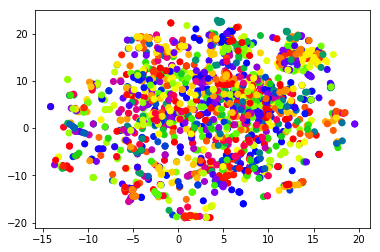

In [11]:
# T-SNE representation of w2v
X = df2[df2.columns[2:302]]
X_embedded = TSNE(n_components=2, verbose=2, metric='cosine').fit_transform(X)

y = df2[df2.columns[1:2]]
cs = pd.factorize(y.category)
plt.scatter(X_embedded[:,0], X_embedded[:,1], color=cm.prism(cs[0])) 

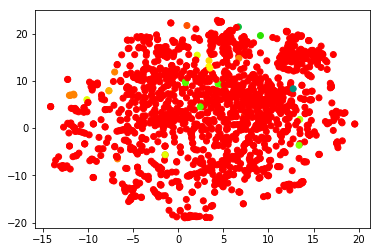

In [12]:
# Try some agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=15, linkage="average", affinity='cosine')
pred = model.fit_predict(X)
y = pred
cs = pd.factorize(y)
plt.scatter(X_embedded[:,0], X_embedded[:,1], color=cm.prism(cs[0])) 

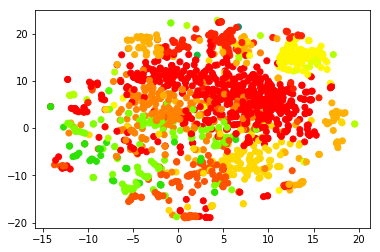

In [13]:
# Try K-means clustering on word vectors

from sklearn.cluster import KMeans
km = KMeans(n_clusters=15, random_state=0).fit(X)

pred = km.labels_
centers = km.cluster_centers_

y = pred
cs = pd.factorize(y)
plt.scatter(X_embedded[:,0], X_embedded[:,1], color=cm.prism(cs[0])) 



In [14]:
# Try plotting these with PCA instead of T-SNE 

In [15]:
# Compare SVM classification into KMeans-categories
# Perform SVM classification based on text vectors from W2V
X = df2[df2.columns[2:302]]
y = df2[df2.columns[1:2]]
y = km.labels_

# Exclude the labels with small category items?
# labelcounts = pd.DataFrame()
# labelcounts['y'] = y
# labelcounts.y.value_counts()

model = SVC()
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/janelleszary/anaconda/envs/my_projects_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.20 (+/- 0.01)


In [67]:
1/len(np.unique(y))

0.06666666666666667

In [17]:
# Find w2v input and use raw text for BoW
mydata = pd.read_csv('data/data1kthreshold.csv')


In [18]:
words = set(nltk.corpus.words.words())

In [64]:
# Only take the descriptions from mydata that match an id in df2
dtext = []
did = []
for i in range(0, len(mydata)):
    if mydata.id[i] in set(df2.id):
        dtext.append(mydata.description[i])
        did.append(mydata.id[i])

In [72]:
for i in range(0, len(dtext)):
    dtext[i] = dtext[i].lower().split() 
#    " ".join(w for w in nltk.wordpunct_tokenize(dtext[i]) if w.lower() in words or not w.isalpha())

In [ ]:
vectorizer = CountVectorizer(binary=True)
Xbinary = vectorizer.fit_transform(mydata.description)
Xbinaryarray = Xbinary.toarray()